In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [6]:
df=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\Dataset\SBI_Historical_Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol,Change_percent
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [8]:
df.shape

(1385, 7)

In [10]:
df.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.to_period('M')

In [14]:
df.head()

,Date,Price,Open,High,Low,Vol,Change_percent
0,2020-08,190.65,191.45,192.10,189.55,44.82M,-0.16%
1,2020-08,190.95,192.30,194.50,190.25,59.74M,-0.26%
2,2020-08,191.45,192.75,196.85,191.00,68.89M,-0.08%
3,2020-08,191.60,193.35,193.80,190.50,43.87M,-0.34%
4,2020-08,192.25,192.00,194.60,190.05,72.46M,0.42%


In [16]:
df.isna().sum()

Date              0
Price             0
Open              0
High              0
Low               0
Vol               0
Change_percent    0
dtype: int64

In [18]:
df.Change_percent.value_counts()

Change_percent
-0.02%    13
0.37%     10
-1.05%     9
0.02%      8
-0.10%     8
          ..
3.56%      1
5.97%      1
0.61%      1
-3.39%     1
-4.11%     1
Name: count, Length: 638, dtype: int64

In [20]:
df=df.drop(['Open','High','Low','Vol','Change_percent'],axis=1)
df.head()

,Date,Price
0,2020-08,190.65
1,2020-08,190.95
2,2020-08,191.45
3,2020-08,191.60
4,2020-08,192.25


In [22]:
df1=df.set_index('Date')
df1

,Price
Date,
2020-08,190.65
2020-08,190.95
2020-08,191.45
2020-08,191.60
2020-08,192.25
...,...
2015-01,300.15
2015-01,299.90
2015-01,312.75


In [25]:
df1

,Price
Date,
2020-08,190.65
2020-08,190.95
2020-08,191.45
2020-08,191.60
2020-08,192.25
...,...
2015-01,300.15
2015-01,299.90
2015-01,312.75


In [27]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Price'])
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                   -2.683735
p-value                           0.076895
#lags used                        7.000000
number of observations used    1377.000000
dtype: float64

* H0 : - The data is  non-stationary
* H1 : - The data is  stationary

* Alpha = 0.05 


Here,p-value is greater than alpha 0.05 s0 we do not reject H0.
* The data is non-stationary

<Axes: xlabel='Date'>

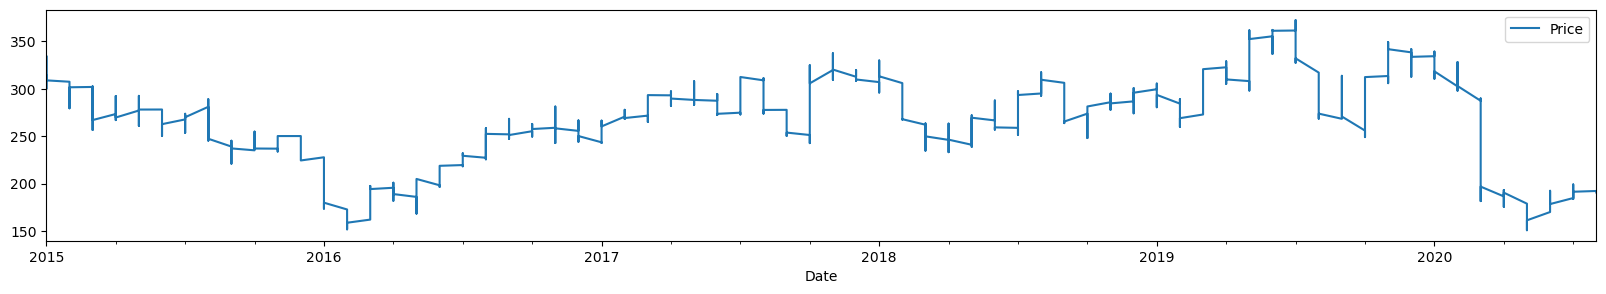

In [31]:
df.plot.line(x = 'Date',y = 'Price',figsize=(20,3))

In [32]:
fit_auto = SimpleExpSmoothing(df1).fit(optimized=True)
fit_auto.params

{'smoothing_level': 0.9989989552814635,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 190.65,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [35]:
df1["Forecast"] = np.round(fit_auto.fittedvalues,2)
df1.head()

,Price,Forecast
Date,,
2020-08,190.65,190.65
2020-08,190.95,190.65
2020-08,191.45,190.95
2020-08,191.60,191.45
2020-08,192.25,191.60


In [37]:
mean_absolute_percentage_error = np.mean(np.abs(df1.Price - df1.Forecast)/np.abs(df1.Price))*100
mean_absolute_percentage_error

1.6028513101694588

In [39]:
fcast1 = fit_auto.forecast(1)
fcast1 

1385    314.001249
dtype: float64

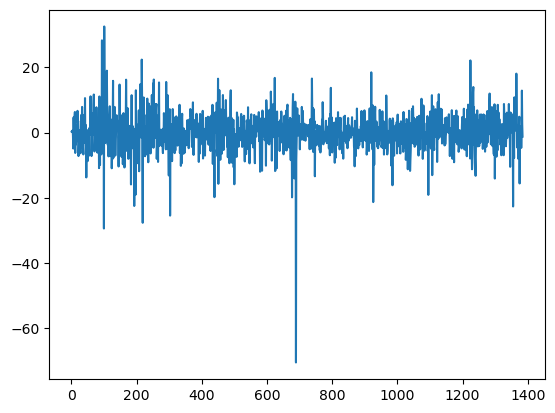

In [42]:
from matplotlib import pyplot

diff = df.Price.diff()
pyplot.plot(diff)
pyplot.show()

In [59]:
df['diff_1'] = df['Price'].diff()  
df['diff_2'] = df['diff_1'].diff() 
df

,Date,Price,diff_1,diff_2
0,2020-08,190.65,NaN,NaN
1,2020-08,190.95,0.30,NaN
2,2020-08,191.45,0.50,0.20
3,2020-08,191.60,0.15,-0.35
4,2020-08,192.25,0.65,0.50
...,...,...,...,...
1380,2015-01,300.15,-4.70,-6.35
1381,2015-01,299.90,-0.25,4.45
1382,2015-01,312.75,12.85,13.10
1383,2015-01,315.25,2.50,-10.35


In [61]:
import numpy as np
np.var(df.iloc[:,1:])

Price     2073.784892
diff_1      35.743569
diff_2      71.627954
dtype: float64

In [63]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.diff_1.iloc[1:])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                -1.379217e+01
p-value                        8.884351e-26
#lags used                     6.000000e+00
number of observations used    1.377000e+03
dtype: float64

<Axes: xlabel='Date'>

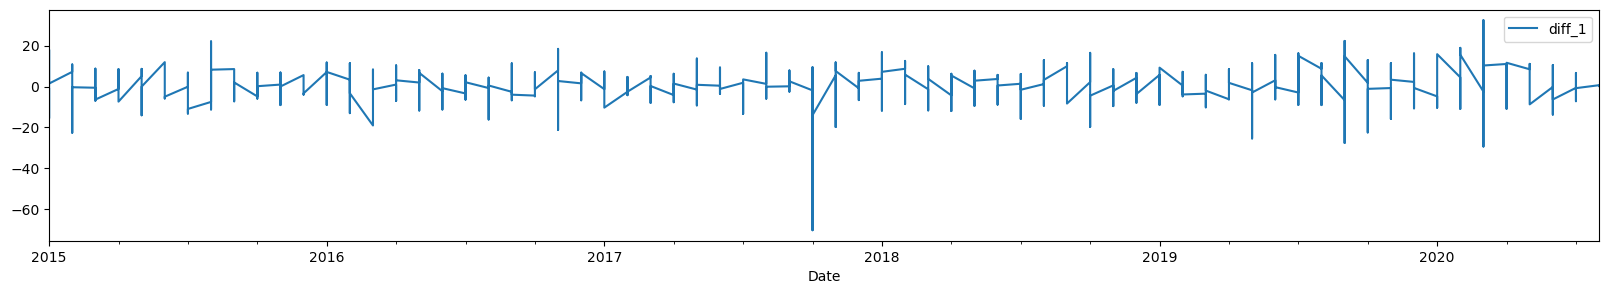

In [65]:
df.plot.line(x = 'Date',y = 'diff_1',figsize=(20,3))

* We Reject Ho, So we can say data is stationary

In [70]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df.Price,
                      start_p=0,max_p=3, 
                      d=0,max_d=2,       
                      start_q=0,max_q=3, 
                      m=12,              
                      seasonal=False,    
                      test='adf',       
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19441.529, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=17564.252, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8897.413, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8897.830, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8898.827, Time=0.45 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8899.729, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8890.987, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12829.475, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8891.476, Time=0.67 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8892.119, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14511.88

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1385
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -4441.494
Date:                Fri, 09 Aug 2024   AIC                           8890.987
Time:                        16:41:10   BIC                           8911.921
Sample:                             0   HQIC                          8898.817
                               - 1385                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1316      0.912      2.336      0.019       0.343       3.920
ar.L1          0.9919      0.003    288.060      0.000       0.985       0.999
ma.L1          0.0031      0.020      0.159      0.874      -0.036       0.042
sigma2        35.6189      0.516     69.093      0.000      34.608      36.629
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14770.80
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
import numpy as np
df['Forecast'] = np.round(model.predict_in_sample(),0)
df.iloc[:,[0,1,4]]

,Date,Price,Forecast
0,2020-08,190.65,264.0
1,2020-08,190.95,191.0
2,2020-08,191.45,192.0
3,2020-08,191.60,192.0
4,2020-08,192.25,192.0
...,...,...,...
1380,2015-01,300.15,305.0
1381,2015-01,299.90,300.0
1382,2015-01,312.75,300.0
1383,2015-01,315.25,312.0


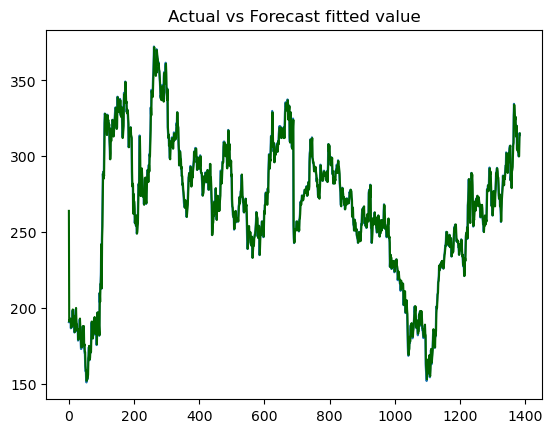

In [76]:
plt.plot(df.Price)
plt.plot(df.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

In [78]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100 
    return({'MAPE':mape})

forecast_accuracy(df.Price,df.Forecast)

{'MAPE': 1.6371308549232768}

In [92]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Price'], df['Forecast'])
mse

39.43773465703971

In [96]:
rmse = np.sqrt(mse)
rmse

6.27994702661095

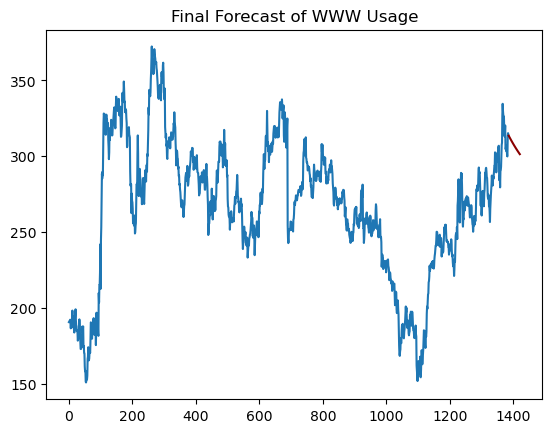

In [86]:
n_periods = 36
fc = model.predict(n_periods=n_periods)

index_of_fc = np.arange(len(df.Price), len(df.Price)+n_periods)


fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.plot(df.Price)
plt.plot(fc_series, color='darkred')
plt.title("Final Forecast of WWW Usage")
plt.show()